# Reuters Newswires Classification

### Import Dataset

In [1]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [2]:
len(train_data), len(test_data)

(8982, 2246)

In [3]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [4]:
train_labels[10]

3

### Preprocess Data

In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [6]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
def to_one_hot(labels, dimension=46):
    results = np.zeros(( len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [8]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [9]:
one_hot_train_labels[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [10]:
# Could also use Keras helper function to_categorical
from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### Build the Model

In [11]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640064    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

### Train the Model

In [14]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [15]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 133us/sample - loss: 2.5081 - accuracy: 0.5337 - val_loss: 1.6703 - val_accuracy: 0.6300
Epoch 2/20
7982/7982 [==============================] - 0s 45us/sample - loss: 1.4041 - accuracy: 0.6967 - val_loss: 1.3143 - val_accuracy: 0.7010
Epoch 3/20
7982/7982 [==============================] - 0s 47us/sample - loss: 1.0725 - accuracy: 0.7663 - val_loss: 1.1448 - val_accuracy: 0.7490
Epoch 4/20
7982/7982 [==============================] - 0s 46us/sample - loss: 0.8624 - accuracy: 0.8147 - val_loss: 1.0441 - val_accuracy: 0.7760
Epoch 5/20
7982/7982 [==============================] - 0s 46us/sample - loss: 0.6943 - accuracy: 0.8505 - val_loss: 0.9899 - val_accuracy: 0.7860
Epoch 6/20
7982/7982 [==============================] - 0s 46us/sample - loss: 0.5643 - accuracy: 0.8809 - val_loss: 0.9323 - val_accuracy: 0.8120
Epoch 7/20
7982/7982 [==============================] - 0s 47us/sampl

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_accuracy(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(acc) + 1)
    
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Epochs vs. Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.show()

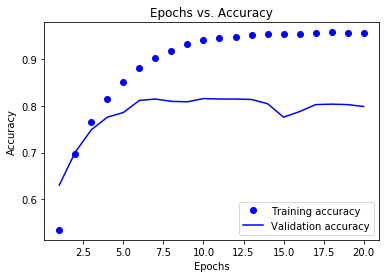

In [17]:
plot_accuracy(history)

### Test the Model

In [18]:
model.evaluate(x_test, one_hot_test_labels)

2246/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.2739445897796169, 0.7858415]

### Experiments

In [19]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [20]:
model.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [21]:
history = model.fit(x_train,
                   y_train,
                   epochs=20,
                   batch_size=512)

Train on 8982 samples
Epoch 1/20
8982/8982 [==============================] - 1s 67us/sample - loss: 0.2349 - accuracy: 0.9403
Epoch 2/20
8982/8982 [==============================] - 0s 33us/sample - loss: 0.1638 - accuracy: 0.9472
Epoch 3/20
8982/8982 [==============================] - 0s 34us/sample - loss: 0.1398 - accuracy: 0.9509
Epoch 4/20
8982/8982 [==============================] - 0s 34us/sample - loss: 0.1287 - accuracy: 0.9516
Epoch 5/20
8982/8982 [==============================] - 0s 34us/sample - loss: 0.1226 - accuracy: 0.9540
Epoch 6/20
8982/8982 [==============================] - 0s 34us/sample - loss: 0.1123 - accuracy: 0.9564
Epoch 7/20
8982/8982 [==============================] - 0s 33us/sample - loss: 0.1151 - accuracy: 0.9561
Epoch 8/20
8982/8982 [==============================] - 0s 34us/sample - loss: 0.1063 - accuracy: 0.9558
Epoch 9/20
8982/8982 [==============================] - 0s 34us/sample - loss: 0.1109 - accuracy: 0.9529
Epoch 10/20
8982/8982 [==========

In [22]:
model.evaluate(x_test, y_test)

2246/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.4694828999859886, 0.78183436]